<a href="https://colab.research.google.com/github/YashSharma79/momentum_gd_from_scratch/blob/main/Momentum_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

13.849444202077139
0.06820073497995371
15.566918923305987
0.0007163858405955454
9.95456260326299
0.00039539898499216377
2.769261320574179
0.36436094728618285
3.957754996468907


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:95: RuntimeWarning: invalid value encountered in true_divide


0.34490428976285137
4.4170338577248005
0.2817338505662887
1.6450513729578986
0.01638209814922489
2.4111615431194515
1.0367118062263563
2.753571753420542
0.04603698253294423
1.8029888350297434
2.6510209712558294e-06
2.8506432991116157
2.548358836491914e-07
6.507903674545389
2.70558132882645e-06
3.953165131465888
0.002782580243113498
1.1426953309283334
0.00020103267153855715
1.0697682528117503
0.0037497348576870262


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in true_divide


27.013310365329723
0.2164729918109567
17.41031538989642
0.22345256413932899
20.958786282536106
0.006875622937715421
15.436130182399445
0.04738242341408613
44.97595856562486
0.6318530741486876
34.25092715785665
0.0010123704196230783
35.14366002343533
0.0064167385084737535
45.644880708991295
0.05509221567090671
7.290913917949608
0.003827926596889354
4.6181035397016545
0.008461453270225733
4.341222517847776
0.0028622567132297193
6.16838417116553
0.0032566176585800814
3.168653019307775
5.838134615674612e-05
2.078843685826967
4.053679920556528e-06
2.2248761313325693
0.00025511051862788317
0.3669945657855988
5.634074187991511e-06
9.979296583688223
0.009635375981750804
13.151344158693556
0.0705564971266986
15.71318567265637
0.02802672368989069
17.648247383358182
0.20937040723919573
6.531754386790853
0.06429909542455556
5.4378413734873225
0.2303376056161582
3.36034225425905
0.0690547354696957
2.1671127055735484
0.06264108251946085
6.703042785944674
0.0024813489136660794
9.56951261960086
0.0004

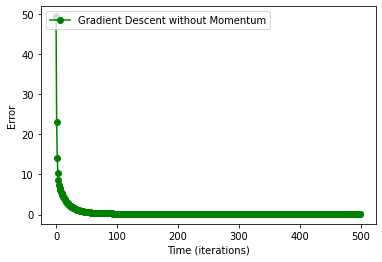

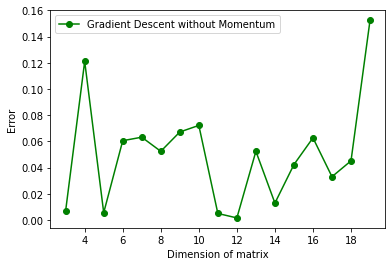

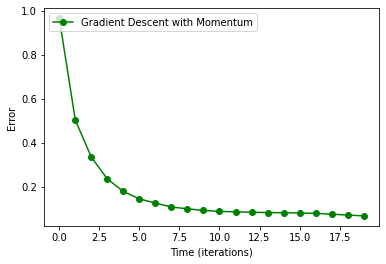

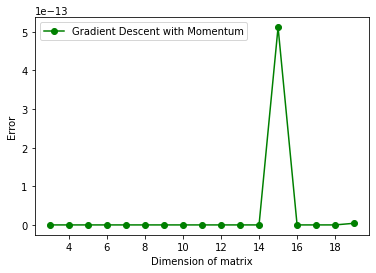

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# plotting
# plotting the graph
def plotter(valueMap, labelX, labelY, name, colour):
  myList = valueMap.items()
  x, y = zip(*myList)

  plt.plot(x, y, marker = 'o', color = colour, label = name)
  plt.legend(loc="upper left")
  plt.xlabel(labelX)
  plt.ylabel(labelY)
  plt.show()

errorToTime1 = {}
errorToDimension1 = {}

errorToTime2 = {}
errorToDimension2 = {}

def gradientDescent(A, v0, ek):
  vT = v0
  norm = np.linalg.norm(A @ vT - ek, 2)
  error = norm * norm
  prevError = error
  print(error)

  alpha = 0.02
  for i in range(0, 500, 1):
    vTPlusOne = vT - alpha * ((A.transpose() @ A @ vT) -  (A.transpose() @ ek))
    vT = vTPlusOne
    norm = np.linalg.norm((A @ vT) - ek, 2)
    
    error = norm * norm

    if i not in errorToTime1:
      errorToTime1[i] = 0

    meanError = (errorToTime1[i] + error) / 2
    errorToTime1[i] = meanError

  print(error)
  #print(vT)
  return error


def variableGradientDescent(A, x0, ek, D):
  xT = x0

  #define as zero vector
  xTMinusOne = np.zeros((D,1))

  norm = np.linalg.norm(A @ xT - ek, 2)
  error = norm * norm
  prevError = error
  #print("Initial error ", error)

  # Take Q as the Hessian of the function in Q1 of HW 2
  # Hessian = Q with all diagonal values = 0
  # Hessian of function F
  # What is function F
  # Take C as EigenVector of the Hessian

  # what should the dimensions of Q be?
  # Q has to be multiplied by xT
  # So columns in Q must match the rows in xT
  # Q is symmetric, so rows in Q = columns in Q

  # how to get dimensions of xT

  # take Q as identity matrix
  Q = A.transpose() @ A
  c = ((-1 * ek.transpose()) @ A).transpose()

  # Lets take c as random vector of dimension D

  for i in range(0, 100, 1):  
    deltaF = (Q @ xT) + c
    R = xT - xTMinusOne

    # M is scalar, Z is scalar, S is scalar
    # deltaFTrans * Q * deltaF is scalar
    U = xT.transpose() @ Q
    V = R.transpose() @ Q
    M = V @ deltaF
    M = M.item()
    N = 2 * (R.transpose() @ V.transpose())
    N = N.item()
    deltaFTrans = deltaF.transpose()
    RTrans = R.transpose()
    UTrans = U.transpose()
    VTrans = V.transpose()
    S = (U @ R + V @ xT + 2 * (c.transpose() @ R)) / N
    
    Z = M + M
    
    S = S.item()

    alphaTNumerator = (-U @ deltaF) - (deltaFTrans @ UTrans) - (2 * (c.transpose() @ deltaF)) + (S * Z)

    if (N == 0.0):
      firstTermInDenom = 0.0

    else:
      firstTermInDenom = (Z*Z) / N


    alphaTDenom = (firstTermInDenom) - (2 * (deltaFTrans @ Q @ deltaF))

    if (alphaTDenom == 0.0):
        alpha = 0.0

    else:
      alpha = (alphaTNumerator / alphaTDenom).item()
    #alpha = 0.01

    #print("Alpha = ", alpha)

    betaT = ((-U @ deltaF) - (deltaFTrans @ UTrans) - (2 * (c.transpose() @ deltaF)) + (2 * alpha * (deltaFTrans @ Q @ deltaF))) / Z
    beta =  betaT.item()
    #print("Beta = ", beta)
    #beta = 0.03
    xTPlusOne = xT - alpha * ((A.transpose() @ A @ xT) -  (A.transpose() @ ek)) + beta * (xT - xTMinusOne)
    #xTPlusOne = xT - alpha * ((A.transpose() @ A @ xT) -  (A.transpose() @ ek))
    xTMinusOne = xT
    xT = xTPlusOne
    norm = np.linalg.norm((A @ xT) - ek, 2)
    
    error = norm * norm

    if i not in errorToTime2:
      errorToTime2[i] = 0

    meanError = (errorToTime2[i] + error) / 2
    errorToTime2[i] = meanError

  #print("Error =", error)
  #print(vT)
  return error


mu, sigma = 0, 1 # mean and standard  

# lets take 10 matrices of each dimension
for D in range(3, 20, 1):
  meanErrorByD1 = 0
  meanErrorByD2 = 0
  for i in range(0, 5, 1):
    A = np.random.normal(mu, sigma, (D,D))
    #print(A)

    # Generate v0 a vector
    v0 = np.random.normal(mu, sigma, (D,1))
    for k in range(0, D, 1):
      ek = np.zeros((D,1))
      ek[k] = 1

      error1 = gradientDescent(A, v0, ek)
      meanErrorByD1 = (meanErrorByD1 + error1) / 2

      error2 = variableGradientDescent(A, v0, ek, D)
      if not math.isnan(error2):
        meanErrorByD2 = (meanErrorByD2 + error2) / 2
      #print("Mean Error by D = ", meanErrorByD)
  errorToDimension1[D] = meanErrorByD1
  errorToDimension2[D] = meanErrorByD2

plotter(errorToTime1, "Time (iterations)", "Error","Gradient Descent without Momentum","green")
plotter(errorToDimension1, "Dimension of matrix", "Error","Gradient Descent without Momentum","green")

plotter(errorToTime2, "Time (iterations)", "Error", "Gradient Descent with Momentum", "green")
plotter(errorToDimension2, "Dimension of matrix", "Error", "Gradient Descent with Momentum", "green")

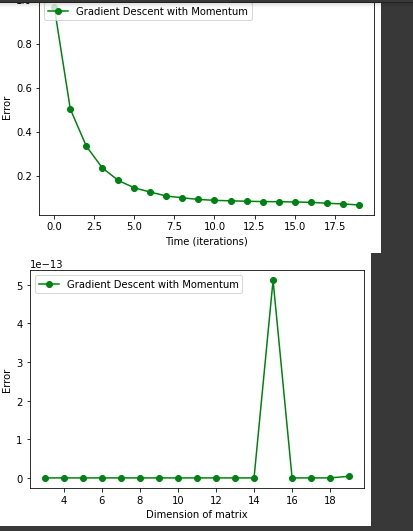

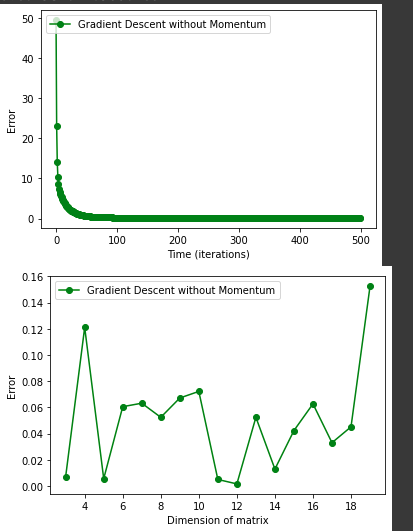